<a href="https://colab.research.google.com/github/yulia1309/visualprogram/blob/main/%D0%BB%D0%B0%D0%B11_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

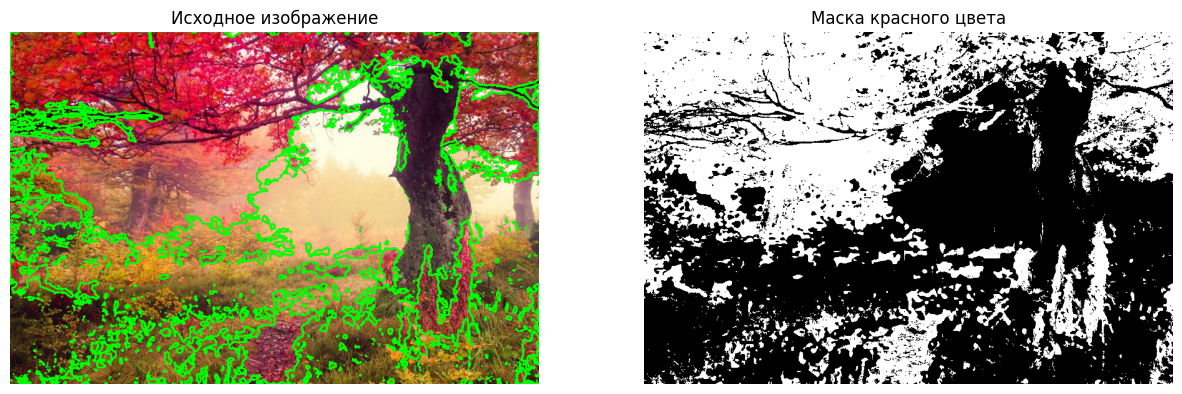

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Загрузка изображения из локального файла
image = cv2.imread('/content/лес.jpg')  # Замените на путь к вашему изображению

# Преобразуем изображение из BGR в HSV
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Определяем диапазон красного цвета в HSV
lower_red1 = np.array([0, 100, 100])  # Нижний предел для красного
upper_red1 = np.array([10, 255, 255])  # Верхний предел для красного
lower_red2 = np.array([160, 100, 100])  # Нижний предел для красного (второй диапазон)
upper_red2 = np.array([180, 255, 255])  # Верхний предел для красного (второй диапазон)

# Создаем маску для красного цвета
mask1 = cv2.inRange(hsv_image, lower_red1, upper_red1)
mask2 = cv2.inRange(hsv_image, lower_red2, upper_red2)
red_mask = mask1 | mask2  # Объединяем маски

# Находим контуры на маске
contours, _ = cv2.findContours(red_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Создаем пустое изображение для отображения контуров
contour_image = np.zeros_like(image)

# Рисуем контуры на пустом изображении
cv2.drawContours(image, contours, -1, (0, 255, 0), 2)  # Зеленые контуры

# Преобразуем изображения из BGR в RGB для отображения
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
red_mask_rgb = cv2.cvtColor(red_mask, cv2.COLOR_GRAY2RGB)
contour_image_rgb = cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB)

# Функция для отображения изображений
def show_images(titles, images):
    plt.figure(figsize=(15, 5))
    for i in range(len(images)):
        plt.subplot(1, len(images), i + 1)
        plt.imshow(images[i])
        plt.title(titles[i])
        plt.axis('off')
    plt.show()

# Отображаем изображения
titles = ['Исходное изображение', 'Маска красного цвета']
images = [image_rgb, red_mask_rgb]
show_images(titles, images)

